# Lab 7

In [3]:
%pip install pandas matplotlib seaborn scipy ydata-profiling setuptools ipywidgets
%pip install -U scikit-learn
%pip install --upgrade setuptools

  Using cached pandas-2.2.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached matplotlib-3.9.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scipy-1.14.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached ydata_profiling-4.10.0-py2.py3-none-any.whl.metadata (20 kB)
  Using cached setuptools-75.1.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached ipywidgets-8.1.5-py3-none-any.whl.metadata (2.3 kB)
  Using cached numpy-2.1.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)


In [5]:
%pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


## Load the DF

In [6]:
import pandas as pd

# Load the file 'insurance' into a dataframe
df_insurance = pd.read_csv('insurance.csv')
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# EDA

In [8]:
# Obtener estadísticas descriptivas básicas del conjunto de datos
df_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


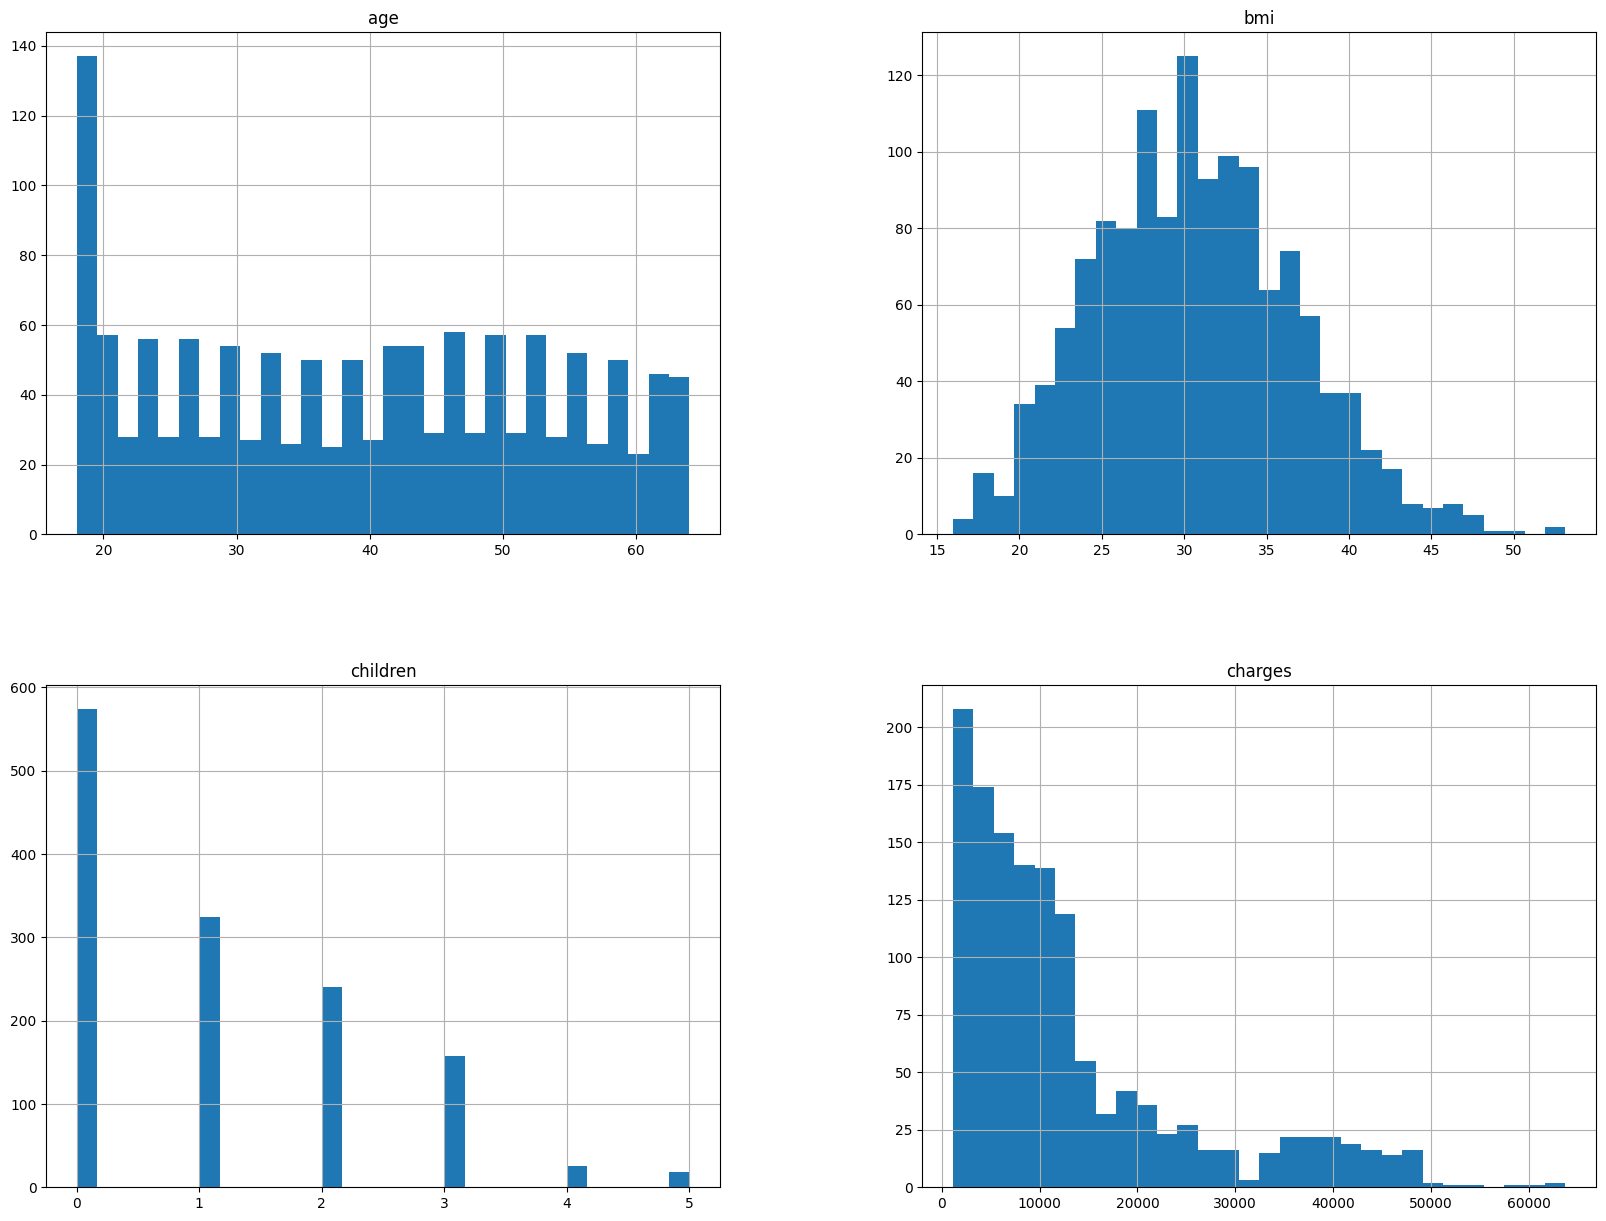

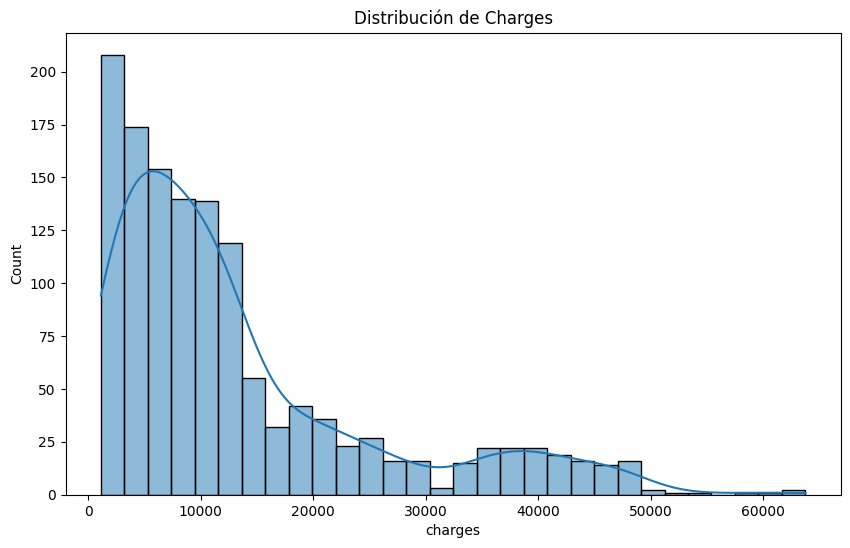

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


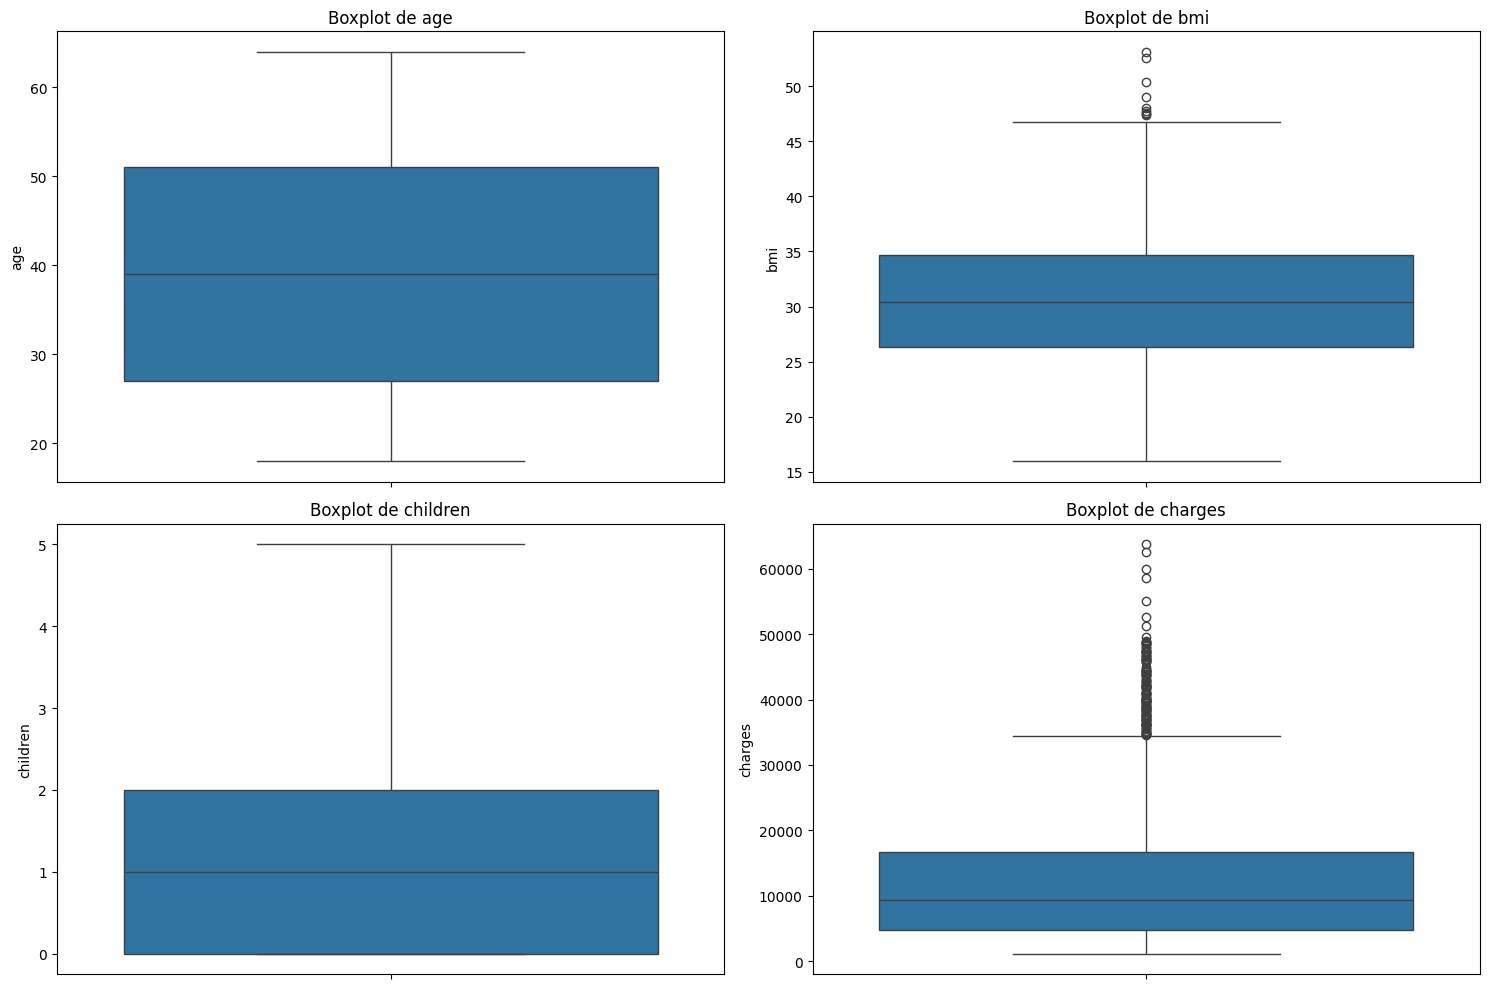

In [7]:
import seaborn as sns
# Visualizar la distribución de las variables
import matplotlib.pyplot as plt

# Histograma de todas las variables numéricas
df_insurance.hist(bins=30, figsize=(20, 15))
plt.show()

# Distribución de la variable 'charges'
plt.figure(figsize=(10, 6))
sns.histplot(df_insurance['charges'], kde=True)
plt.title('Distribución de Charges')
plt.show()

# Verificar la presencia de valores nulos
print(df_insurance.isnull().sum())

# Verificar la presencia de valores atípicos usando boxplots
plt.figure(figsize=(15, 10))
for i, column in enumerate(['age', 'bmi', 'children', 'charges'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df_insurance[column])
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()